In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('Data_Train.xlsx')

## EXPLORATORY DATA ANALYSIS

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.shape

(10683, 11)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.duplicated().sum()

220

In [9]:
data.drop_duplicates()
print(data.shape)

(10682, 11)


In [10]:
data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
print(data['Airline'].unique())
print(data['Airline'].nunique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
12


In [12]:
print(data['Date_of_Journey'].unique())
print(data['Date_of_Journey'].nunique())

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
44


In [13]:
print(data['Source'].unique())
print(data['Source'].nunique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
5


In [14]:
print(data['Destination'].unique())
print(data['Destination'].nunique())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
6


In [15]:
print(data['Route'].unique())
print(data['Route'].nunique())

['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [16]:
print(data['Dep_Time'].unique())
print(data['Dep_Time'].nunique())

['22:20' '05:50' '09:25' '18:05' '16:50' '09:00' '18:55' '08:00' '08:55'
 '11:25' '09:45' '20:20' '11:40' '21:10' '17:15' '16:40' '08:45' '14:00'
 '20:15' '16:00' '14:10' '22:00' '04:00' '21:25' '21:50' '07:00' '07:05'
 '09:50' '14:35' '10:35' '15:05' '14:15' '06:45' '20:55' '11:10' '05:45'
 '19:00' '23:05' '11:00' '09:35' '21:15' '23:55' '19:45' '08:50' '15:40'
 '06:05' '15:00' '13:55' '05:55' '13:20' '05:05' '06:25' '17:30' '08:20'
 '19:55' '06:30' '14:05' '02:00' '09:40' '08:25' '20:25' '13:15' '02:15'
 '16:55' '20:45' '05:15' '19:50' '20:00' '06:10' '19:30' '04:45' '12:55'
 '18:15' '17:20' '15:25' '23:00' '12:00' '14:45' '11:50' '11:30' '14:40'
 '19:10' '06:00' '23:30' '07:35' '13:05' '12:30' '15:10' '12:50' '18:25'
 '16:30' '00:40' '06:50' '13:00' '19:15' '01:30' '17:00' '10:00' '19:35'
 '15:30' '12:10' '16:10' '20:35' '22:25' '21:05' '05:35' '05:10' '06:40'
 '15:15' '00:30' '08:30' '07:10' '05:30' '14:25' '05:25' '10:20' '17:45'
 '13:10' '22:10' '04:55' '17:50' '21:20' '06:20' '1

In [17]:
print(data['Arrival_Time'].unique())
print(data['Arrival_Time'].nunique())

['01:10 22 Mar' '13:15' '04:25 10 Jun' ... '06:50 10 Mar' '00:05 19 Mar'
 '21:20 13 Mar']
1343


In [18]:
print(data['Duration'].unique())
print(data['Duration'].nunique())

['2h 50m' '7h 25m' '19h' '5h 25m' '4h 45m' '2h 25m' '15h 30m' '21h 5m'
 '25h 30m' '7h 50m' '13h 15m' '2h 35m' '2h 15m' '12h 10m' '26h 35m'
 '4h 30m' '22h 35m' '23h' '20h 35m' '5h 10m' '15h 20m' '2h 55m' '13h 20m'
 '15h 10m' '5h 45m' '5h 55m' '13h 25m' '22h' '5h 30m' '10h 25m' '5h 15m'
 '2h 30m' '6h 15m' '11h 55m' '11h 5m' '8h 30m' '22h 5m' '2h 45m' '12h'
 '16h 5m' '19h 55m' '3h 15m' '25h 20m' '3h' '16h 15m' '15h 5m' '6h 30m'
 '25h 5m' '12h 25m' '27h 20m' '10h 15m' '10h 30m' '1h 30m' '1h 25m'
 '26h 30m' '7h 20m' '13h 30m' '5h' '19h 5m' '14h 50m' '2h 40m' '22h 10m'
 '9h 35m' '10h' '21h 20m' '18h 45m' '12h 20m' '18h' '9h 15m' '17h 30m'
 '16h 35m' '12h 15m' '7h 30m' '24h' '8h 55m' '7h 10m' '14h 30m' '30h 20m'
 '15h' '12h 45m' '10h 10m' '15h 25m' '14h 5m' '20h 15m' '23h 10m'
 '18h 10m' '16h' '2h 20m' '8h' '16h 55m' '3h 10m' '14h' '23h 50m'
 '21h 40m' '21h 15m' '10h 50m' '8h 15m' '8h 35m' '11h 50m' '27h 35m'
 '8h 25m' '20h 55m' '4h 50m' '8h 10m' '24h 25m' '23h 35m' '25h 45m'
 '26h 10m' '28h 

In [19]:
print(data['Total_Stops'].unique())
print(data['Total_Stops'].nunique())

['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
5


In [20]:
print(data['Additional_Info'].unique())
print(data['Additional_Info'].nunique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
10


In [21]:
print(data['Price'].unique())
print(data['Price'].nunique())

[ 3897  7662 13882 ...  9790 12352 12648]
1870


### Count Plots

Text(0, 0.5, 'Price')

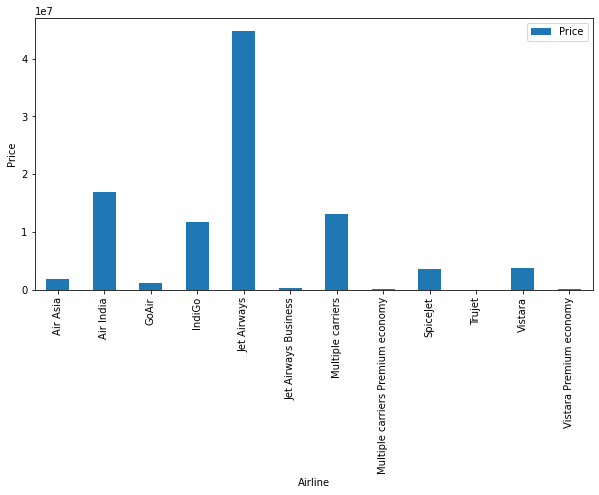

In [22]:
data.pivot_table(data[['Price']],index=['Airline'],aggfunc='sum').plot(kind='bar',figsize=(10,5)) 
plt.xlabel('Airline')
plt.ylabel('Price')

In [23]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Text(0, 0.5, 'Price')

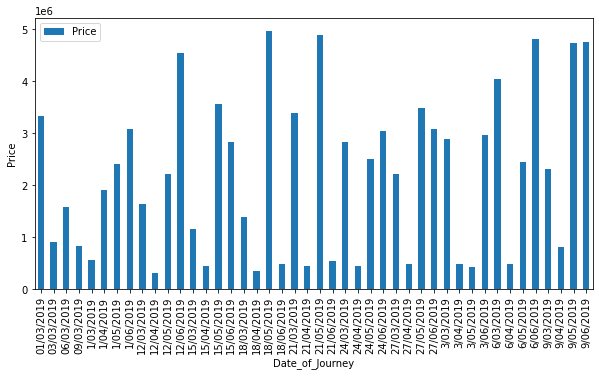

In [24]:
data.pivot_table(data[['Price']],index=['Date_of_Journey'],aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

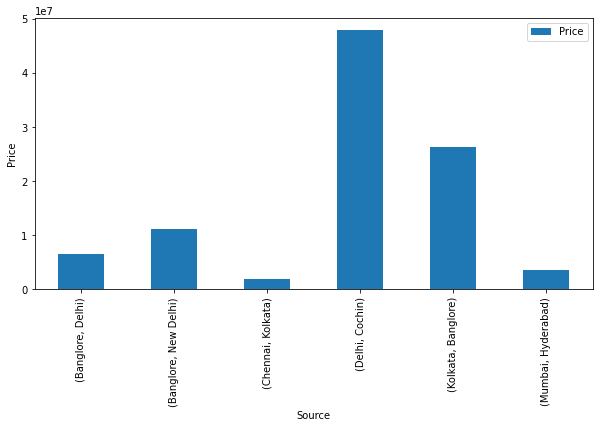

In [25]:
data.pivot_table(data[['Price']],index=['Source','Destination'],aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.xlabel('Source')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

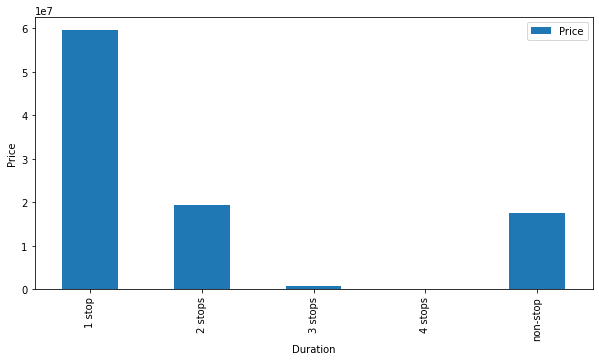

In [26]:
data.pivot_table(data[['Price']],index=['Total_Stops'],aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.xlabel('Duration')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

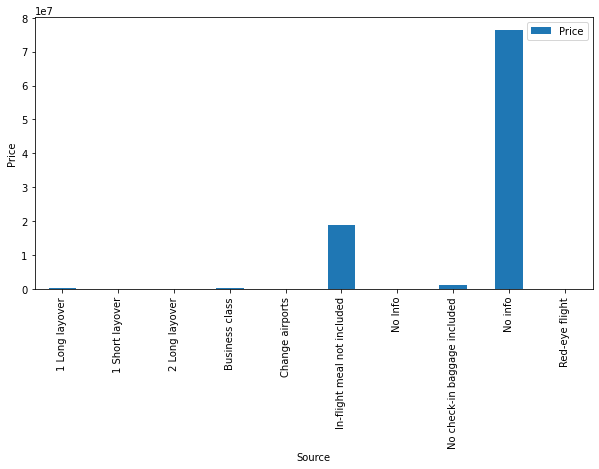

In [27]:
data.pivot_table(data[['Price']],index=['Additional_Info'],aggfunc='sum').plot(kind='bar',figsize=(10,5))
plt.xlabel('Source')
plt.ylabel('Price')

## FEATURE ENGINEERING

In [28]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [29]:
# changing No_Info column in Additional_Info to 'no_info'

data[data['Additional_Info']=='No Info']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
795,IndiGo,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,16:55,21:50,4h 55m,1 stop,No Info,8153
2212,IndiGo,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,16:15,20:35,4h 20m,1 stop,No Info,7917
9220,IndiGo,2019-01-03,Banglore,New Delhi,BLR → HYD → DEL,05:15,10:00,4h 45m,1 stop,No Info,8064


In [30]:
data['Additional_Info'].replace('No Info', 'No info',inplace=True)

In [31]:
# creating day and month columns from the Date of Journey field.

import datetime as dt

data['DOJ_Month']=data['Date_of_Journey'].dt.month
data['DOJ_Day']=data['Date_of_Journey'].dt.day
data=data.drop(['Date_of_Journey'],axis=1)

In [32]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ_Month,DOJ_Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [33]:
# treating departure time and arrival time

data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute']=pd.to_datetime(data['Dep_Time']).dt.minute
data=data.drop(['Dep_Time'],axis=1)

data['Arrival_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute']=pd.to_datetime(data['Arrival_Time']).dt.minute
data=data.drop(['Arrival_Time'],axis=1)

In [34]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,DOJ_Month,DOJ_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [35]:
# correcting the 5m data entry of Duration column

data.loc[data['Duration']== '5m', 'Duration'] = '1h 25m'

In [36]:
data['Duration_hours'] =  data['Duration'].apply(lambda x: str(x).split('h')[0]).astype('int')
data['Duration_minutes'] = data['Duration'].apply(lambda x: 0 if ((str(x).split('h')[1].split('m')[0])=='') else str(x).split('h')[1].split('m')[0]).astype('int')

In [37]:
data=data.drop('Duration',axis=1)

In [38]:
data.Duration_hours.unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39, 41, 40])

In [39]:
data.Duration_minutes.unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   DOJ_Month         10682 non-null  int64 
 8   DOJ_Day           10682 non-null  int64 
 9   Dep_Hour          10682 non-null  int64 
 10  Dep_Minute        10682 non-null  int64 
 11  Arrival_Hour      10682 non-null  int64 
 12  Arrival_Minute    10682 non-null  int64 
 13  Duration_hours    10682 non-null  int32 
 14  Duration_minutes  10682 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ MB


In [41]:
# treating the Total_Stops column
data['Total_Stops'].str.split(' ')
data['Stops'] = data['Total_Stops'].apply(lambda x: 0 if (str(x).split(' ')[0] =='non-stop') else (str(x).split(' ')[0])).astype('int')

In [42]:
data=data.drop('Total_Stops',axis=1)

In [43]:
data.head(5)

,Airline,Source,Destination,Route,Additional_Info,Price,DOJ_Month,DOJ_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_hours,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,3,24,22,20,1,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,9,25,4,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,18,5,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,16,50,21,35,4,45,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Additional_Info   10682 non-null  object
 5   Price             10682 non-null  int64 
 6   DOJ_Month         10682 non-null  int64 
 7   DOJ_Day           10682 non-null  int64 
 8   Dep_Hour          10682 non-null  int64 
 9   Dep_Minute        10682 non-null  int64 
 10  Arrival_Hour      10682 non-null  int64 
 11  Arrival_Minute    10682 non-null  int64 
 12  Duration_hours    10682 non-null  int32 
 13  Duration_minutes  10682 non-null  int32 
 14  Stops             10682 non-null  int32 
dtypes: int32(3), int64(7), object(5)
memory usage: 1.2+ MB


## FEATURE SELECTION

In [45]:
X=data.drop(['Price'],axis=1)
y=data['Price']
print(X.shape,y.shape)

(10682, 14) (10682,)


In [46]:
# separating the date into numerical, nominal and categorical fields

cat=['Airline','Source','Destination','Route','Additional_Info']
num=['DOJ_Month','DOJ_Day','Dep_Hour','Dep_Minute','Arrival_Hour','Arrival_Minute','Duration_hours','Duration_minutes','Stops']

In [47]:
X_num,X_cat=X[num],X[cat]

Feature 0: 1.224116
Feature 1: 300.570910
Feature 2: 0.493755
Feature 3: 6.392435
Feature 4: 6.280954
Feature 5: 79.867692
Feature 6: 3730.648845
Feature 7: 168.611036
Feature 8: 6130.729912


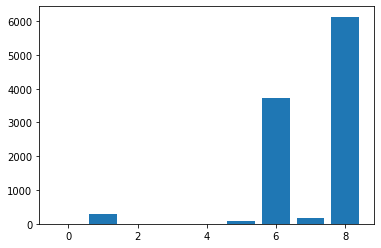

In [142]:
# Applying Pearson's correlation on X_num

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
fs = SelectKBest(score_func=f_regression, k=2)
# learn relationship from training data
fs.fit(X_num, y)
# transform train input data
X_num_fs = fs.transform(X_num)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 78.817513
Feature 1: 182.691925
Feature 2: 110.977806
Feature 3: 251.460602
Feature 4: 41.539436


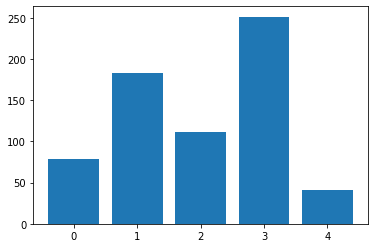

In [49]:
# Applying ANOVA F-Test on X_cat

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

oe=OrdinalEncoder()
X_cat_oe=oe.fit_transform(X_cat).astype('int')

fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_cat_oe, y)
# transform train input data
X_cat_fs = fs.transform(X_cat)
# transform
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [50]:
X_new=pd.concat([pd.DataFrame(X_num_fs),pd.DataFrame(X_cat_fs)],axis=1)
print(X_new.shape)

(10682, 7)


In [51]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10682 non-null  int64 
 1   1       10682 non-null  int64 
 2   0       10682 non-null  object
 3   1       10682 non-null  object
 4   2       10682 non-null  object
 5   3       10682 non-null  object
 6   4       10682 non-null  object
dtypes: int64(2), object(5)
memory usage: 584.3+ KB


### ONE HOT ENCODING

In [52]:
X_final=pd.get_dummies(pd.DataFrame(X_new),drop_first=True)
print(X_final.shape)

(10682, 157)


### TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

X_temp,X_test,y_temp,y_test=train_test_split(X_final,y,test_size=0.1) 
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.2)
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(7690, 157) (1923, 157) (1069, 157) (7690,) (1923,) (1069,)


## DATA SCALING

### Scaling of training, testing and validation dataset features

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_val_scaled = mms.transform(X_val)
X_test_scaled = mms.transform(X_test)
print(X_train_scaled.shape,X_val.shape,X_test_scaled.shape)

(7690, 157) (1923, 157) (1069, 157)


In [55]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_val_std = ss.transform(X_val)
X_test_std = ss.transform(X_test)
print(X_train_std.shape,X_val.shape,X_test_std.shape)

(7690, 157) (1923, 157) (1069, 157)


In [56]:
from sklearn.preprocessing import PowerTransformer
pt1=PowerTransformer(method='yeo-johnson',standardize=True)
pt1.fit(X_train)
X_train_pow_yeo = pt1.transform(X_train)
X_val_pow_yeo = pt1.transform(X_val)
X_test_pow_yeo = pt1.transform(X_test)
print(X_train_pow_yeo.shape,X_val_pow_yeo.shape,X_test_pow_yeo.shape)

c:\users\manya\python\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


(7690, 157) (1923, 157) (1069, 157)


### Scaling of target variable

In [59]:
# Min max scaler

from sklearn.preprocessing import MinMaxScaler

mms1=MinMaxScaler(feature_range=(0,1))
mms1.fit(y_train.to_numpy().reshape(-1,1))
y_train_scaled = mms1.transform(y_train.to_numpy().reshape(-1,1)).flatten()
y_val_scaled = mms1.transform(y_val.to_numpy().reshape(-1,1)).flatten()
y_test_scaled = mms1.transform(y_test.to_numpy().reshape(-1,1)).flatten()
print(y_train_scaled.shape,y_val_scaled.shape,y_test_scaled.shape)

(7690,) (1923,) (1069,)


In [60]:
#standard scaler

from sklearn.preprocessing import StandardScaler
ss1=StandardScaler()
ss1.fit(y_train.to_numpy().reshape(-1,1))
y_train_std = ss1.transform(y_train.to_numpy().reshape(-1,1)).flatten()
y_val_std = mms1.transform(y_val.to_numpy().reshape(-1,1)).flatten()
y_test_std = ss1.transform(y_test.to_numpy().reshape(-1,1)).flatten()
print(y_train_std.shape,y_val_std.shape,y_test_std.shape)

(7690,) (1923,) (1069,)


In [ ]:
#  yeo-johnson transformer

from sklearn.preprocessing import PowerTransformer
pt3=PowerTransformer(method='yeo-johnson',standardize=True)
pt3.fit(y_train.to_numpy().reshape(-1,1))
y_train_pow_yeo = pt3.transform(y_train.to_numpy().reshape(-1,1)).flatten()
y_val_pow_yeo = pt3.transform(y_val.to_numpy().reshape(-1,1)).flatten()
y_test_pow_yeo = pt3.transform(y_test.to_numpy().reshape(-1,1)).flatten()
print(y_train_pow_yeo.shape,y_test_pow_yeo.shape,y_test_pow_yeo.shape)

### CHECK FOR DATA SKEWNESS

In [64]:
from scipy.stats import skew
y_train_skew = skew(y_train,axis=0)
print(y_train_skew)

1.5931425162352282


In [65]:
y_train_pow_skew = skew(y_train_pow_yeo,axis=0)
print(y_train_pow_skew)

-0.013749344350440545


In [66]:
y_train_std_skew= skew(y_train_std,axis=0)
print(y_train_std_skew)

1.5931425162352286


In [67]:
y_train_log_skew = skew(np.log(y_train+1),axis=0)
print(y_train_log_skew)

-0.25710716596097744


## MODELLING

### I. REGRESSION BASED ALGORITHMS

### 1. Linear Regression

In [68]:
X_train_lr=np.concatenate([X_train_scaled,X_val_scaled],axis=0)
print(X_train_lr.shape)

(9613, 157)


In [69]:
y_train_lr = np.concatenate([y_train,y_val],axis=0)
print(y_train_lr.shape)

(9613,)


In [70]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train_lr,y_train_lr)

LinearRegression()

In [71]:
y_pred_lr=linreg.predict(X_test_scaled)
print(y_pred_lr.shape)

(1069,)


In [72]:
pd.Series(y_pred_lr).value_counts()

11339.0    39
11331.0    38
4105.0     25
4701.0     24
2719.0     24
           ..
13193.0     1
9434.0      1
15333.0     1
12717.0     1
14390.0     1
Length: 334, dtype: int64

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
test_mae_lr = mean_absolute_error(y_test,y_pred_lr)
test_mse_lr = mean_squared_error(y_test,y_pred_lr)
test_r2_square_lr= r2_score(y_test,y_pred_lr)
print(test_mse_lr)
print(test_mae_lr)
print(test_r2_square_lr)

3.601037966469398e+26
580396785728.2582
-1.7028897010082515e+19


### 2. Support Vector Regressor

In [74]:
X_train_svr=np.concatenate([X_train_scaled,X_val_scaled],axis=0)
print(X_train_svr.shape)

(9613, 157)


In [75]:
y_train_svr = np.concatenate([y_train,y_val],axis=0)
print(y_train_svr.shape)

(9613,)


In [76]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_svr,y_train_svr)

SVR()

In [78]:
y_pred_svr=svr.predict(X_test_scaled)
print(y_pred_svr.shape)

(1069,)


In [79]:
pd.Series(y_pred_svr).value_counts()

7395.560625    25
7672.292114    24
7686.158480    24
8570.125757    23
7736.498989    19
               ..
8052.986605     1
8716.080044     1
8232.376877     1
8883.990470     1
8732.422183     1
Length: 387, dtype: int64

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_svr = mean_absolute_error(y_test,y_pred_svr)
test_mse_svr = mean_squared_error(y_test,y_pred_svr)
test_r2_square_svr= r2_score(y_test,y_pred_svr)
print(test_mse_svr)
print(test_mae_svr)
print(test_r2_square_svr)

19768169.900976606
3351.6821995029195
0.06518583681696277


### 3. K- Neighbour Regressor

In [81]:
X_train_knr=np.concatenate([X_train_scaled,X_val_scaled],axis=0)
print(X_train_knr.shape)

(9613, 157)


In [82]:
y_train_knr = np.concatenate([y_train,y_val],axis=0)
print(y_train_knr.shape)

(9613,)


In [83]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_knr,y_train_knr)

KNeighborsRegressor()

In [84]:
y_pred_knr=knr.predict(X_test_scaled)
print(y_pred_knr.shape)

(1069,)


In [85]:
pd.Series(y_pred_knr).value_counts()

4239.8     25
4541.2     24
3208.2     24
12414.8    23
7386.4     19
           ..
9832.2      1
13292.0     1
13851.2     1
3949.0      1
13860.0     1
Length: 375, dtype: int64

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_knr = mean_absolute_error(y_test,y_pred_knr)
test_mse_knr = mean_squared_error(y_test,y_pred_knr)
test_r2_square_knr= r2_score(y_test,y_pred_knr)
print(test_mse_knr)
print(test_mae_knr)
print(test_r2_square_knr)

6878505.19861553
1454.0948550046771
0.6747233500418124


### 4. Decision Tree Regressor

In [87]:
X_train_dtr=np.concatenate([X_train_scaled,X_val_scaled],axis=0)
print(X_train_dtr.shape)

(9613, 157)


In [88]:
y_train_dtr = np.concatenate([y_train,y_val],axis=0)
print(y_train_dtr.shape)

(9613,)


In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dtr,y_train_dtr)

DecisionTreeRegressor()

In [90]:
y_pred_dtr=dtr.predict(X_test_scaled)
print(y_pred_dtr.shape)

(1069,)


In [91]:
pd.Series(y_pred_dtr).value_counts()

4379.425676     25
4823.439189     24
3628.929825     24
11232.772727    23
4555.224242     19
                ..
12395.000000     1
6465.025641      1
13635.500000     1
14015.000000     1
13430.857143     1
Length: 378, dtype: int64

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_dtr = mean_absolute_error(y_test,y_pred_dtr)
test_mse_dtr = mean_squared_error(y_test,y_pred_dtr)
test_r2_square_dtr= r2_score(y_test,y_pred_dtr)
print(test_mse_dtr)
print(test_mae_dtr)
print(test_r2_square_dtr)

5771867.408775245
1390.3184747084076
0.7270549864370036


### 5. Bagging Regressor

In [93]:
X_train_br=np.concatenate([X_train_scaled,X_val_scaled],axis=0)
print(X_train_dtr.shape)

(9613, 157)


In [94]:
y_train_br = np.concatenate([y_train,y_val],axis=0)
print(y_train_dtr.shape)

(9613,)


In [95]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(X_train_br,y_train_br)

BaggingRegressor()

In [96]:
y_pred_br=br.predict(X_test_scaled)
print(y_pred_br.shape)

(1069,)


In [97]:
pd.Series(y_pred_br).value_counts()

4385.569716     25
3713.132370     24
4827.356079     24
11167.481166    23
4560.836244     19
                ..
12395.000000     1
6519.015358      1
13283.355000     1
14379.558333     1
13190.039841     1
Length: 382, dtype: int64

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_br = mean_absolute_error(y_test,y_pred_br)
test_mse_br = mean_squared_error(y_test,y_pred_br)
test_r2_square_br= r2_score(y_test,y_pred_br)
print(test_mse_br)
print(test_mae_br)
print(test_r2_square_br)

5589049.266798548
1375.9613117738627
0.7357002474430909


### II. DECISION TREES BASED ALGORITHMS

### 1. Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_features=0.924508638782942, max_leaf_nodes=81,n_estimators=12)
rf.fit(X_train_scaled,y_train);

In [109]:
y_pred_rf=rf.predict(X_test_scaled)
print(y_pred_rf.shape)

(1069,)


In [110]:
pd.Series(y_pred_rf).value_counts()

4548.186897     85
9865.296637     57
10618.300040    54
14074.056240    46
4070.274008     41
                ..
9901.194197      1
10190.531252     1
5823.000000      1
10516.925128     1
10484.902788     1
Length: 183, dtype: int64

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_rf = mean_absolute_error(y_test,y_pred_rf)
test_mse_rf = mean_squared_error(y_test,y_pred_rf)
test_r2_score_rf = r2_score(y_test,y_pred_rf)
print(test_mse_rf)
print(test_mae_rf)
print(test_r2_score_rf)

6090719.614988733
1384.7489145383913
0.7007190965702919


In [80]:
## AUTO ML

from flaml import AutoML
auto_model = AutoML()
auto_model.fit(X_train = X_train_scaled, y_train = y_train, X_val = X_val_scaled, y_val= y_val, 
          task = 'regression' , # 'regression','classification' 
          metric = 'mse' , 
          eval_method = 'holdout', # 'cv' , 'holdout' 
          # n_split = 5, # used with 'cv'
          # split_type = 'uniform' # 'stratified' , 'uniform' used with 'cv'
          estimator_list = ['rf'] , # regression - 'rf', 'lgbm', 'xgboost', 'catboost', 'xgb_limit_depth', 'extra_tree'
                                  # classification - 'lrl1','lrl2' (additional)    
          # ensemble = True, # model emsembling
          # sample_weight = 'balanced' # used with imbalanced targets
          time_budget = 1200 # in seconds 
         )

model= auto_model.model # selects best model      

[flaml.automl: 06-27 10:06:48] {2390} INFO - task = regression
[flaml.automl: 06-27 10:06:48] {2392} INFO - Data split method: uniform
[flaml.automl: 06-27 10:06:48] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-27 10:06:48] {2465} INFO - Minimizing error metric: mse
[flaml.automl: 06-27 10:06:48] {2605} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 06-27 10:06:48] {2897} INFO - iteration 0, current learner rf
[flaml.automl: 06-27 10:06:48] {3025} INFO - Estimated sufficient time budget=1090s. Estimated necessary time budget=1s.
[flaml.automl: 06-27 10:06:48] {3072} INFO -  at 0.1s,	estimator rf's best error=8402533.8140,	best estimator rf's best error=8402533.8140
[flaml.automl: 06-27 10:06:48] {2897} INFO - iteration 1, current learner rf
[flaml.automl: 06-27 10:06:48] {3072} INFO -  at 0.3s,	estimator rf's best error=6034867.8133,	best estimator rf's best error=6034867.8133
[flaml.automl: 06-27 10:06:48] {2897} INFO - iteration 2, current learner rf
[f

In [81]:
import pickle 
pickle.dump(model,open('model_rf_ML','wb'))

In [99]:
import pickle
model_rf=pickle.load(open('model_rf_ML','rb'))

In [100]:
y_pred_rf=model_rf.predict(X_test_scaled)
print(y_pred_rf.shape)

(1069,)


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_rf_ML = mean_absolute_error(y_test,y_pred_rf)
test_mse_rf_ML = mean_squared_error(y_test,y_pred_rf)
test_r2_square_ML=r2_score(y_test,y_pred_rf)
print(test_mse_rf_ML)
print(test_mae_rf_ML)
print(test_r2_square_ML)

5213946.157157805
1366.587230627283
0.7534384448231551


### 2. XGBoost Regressor

In [85]:
## AUTO ML

from flaml import AutoML
auto_model = AutoML()
auto_model.fit(X_train = X_train_scaled, y_train = y_train, X_val = X_val_scaled, y_val= y_val, 
          task = 'regression' , # 'regression','classification' 
          metric = 'mse' , 
          eval_method = 'holdout', # 'cv' , 'holdout' 
          # n_split = 5, # used with 'cv'
          # split_type = 'uniform' # 'stratified' , 'uniform' used with 'cv'
          estimator_list = ['xgboost'] , # regression - 'rf', 'lgbm', 'xgboost', 'catboost', 'xgb_limit_depth', 'extra_tree'
                                  # classification - 'lrl1','lrl2' (additional)    
          # ensemble = True, # model emsembling
          # sample_weight = 'balanced' # used with imbalanced targets
          time_budget = 1500 # in seconds 
         )

model1= auto_model.model # selects best model      

[flaml.automl: 06-27 10:26:48] {2390} INFO - task = regression
[flaml.automl: 06-27 10:26:48] {2392} INFO - Data split method: uniform
[flaml.automl: 06-27 10:26:48] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-27 10:26:48] {2465} INFO - Minimizing error metric: mse
[flaml.automl: 06-27 10:26:48] {2605} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 06-27 10:26:48] {2897} INFO - iteration 0, current learner xgboost
[flaml.automl: 06-27 10:26:48] {3025} INFO - Estimated sufficient time budget=814s. Estimated necessary time budget=1s.
[flaml.automl: 06-27 10:26:48] {3072} INFO -  at 0.1s,	estimator xgboost's best error=48018380.4456,	best estimator xgboost's best error=48018380.4456
[flaml.automl: 06-27 10:26:48] {2897} INFO - iteration 1, current learner xgboost
[flaml.automl: 06-27 10:26:48] {3072} INFO -  at 0.2s,	estimator xgboost's best error=48018380.4456,	best estimator xgboost's best error=48018380.4456
[flaml.automl: 06-27 10:26:48] {2897} INF

In [89]:
import pickle 
pickle.dump(model1,open('model_xgboost_ML','wb'))

In [125]:
import pickle
model_xg_ML=pickle.load(open('model_xgboost_ML','rb'))

In [126]:
y_pred_xg_ML=model_xg_ML.predict(X_test_scaled)
print(y_pred_xg_ML.shape)

(1069,)


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_xgboost_ML = mean_absolute_error(y_test,y_pred_xg_ML)
test_mse_xgboost_ML = mean_squared_error(y_test,y_pred_xg_ML)
test_r2_score_xgboost_ML = r2_score(y_test,y_pred_xg_ML)
print(test_mse_xgboost_ML)
print(test_mae_xgboost_ML)
print(test_r2_score_xgboost_ML)

4866591.053908598
1314.0640472151906
0.769864470691904


### 3. Light Gradient Boosted Machine Regressor

In [139]:
## AUTO ML

from flaml import AutoML
auto_model = AutoML()
auto_model.fit(X_train = X_train_scaled, y_train = y_train, X_val = X_val_scaled, y_val= y_val, 
          task = 'regression' , # 'regression','classification' 
          metric = 'mse' , 
          eval_method = 'holdout', # 'cv' , 'holdout' 
          # n_split = 5, # used with 'cv'
          # split_type = 'uniform' # 'stratified' , 'uniform' used with 'cv'
          estimator_list = ['lgbm'] , # regression - 'rf', 'lgbm', 'xgboost', 'catboost', 'xgb_limit_depth', 'extra_tree'
                                  # classification - 'lrl1','lrl2' (additional)    
          # ensemble = True, # model emsembling
          # sample_weight = 'balanced' # used with imbalanced targets
          time_budget = 1700 # in seconds 
         )

model2= auto_model.model # selects best model      

[flaml.automl: 06-27 16:24:49] {2390} INFO - task = regression
[flaml.automl: 06-27 16:24:49] {2392} INFO - Data split method: uniform
[flaml.automl: 06-27 16:24:49] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-27 16:24:49] {2465} INFO - Minimizing error metric: mse
[flaml.automl: 06-27 16:24:49] {2605} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 06-27 16:24:49] {2897} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-27 16:24:49] {3025} INFO - Estimated sufficient time budget=758s. Estimated necessary time budget=1s.
[flaml.automl: 06-27 16:24:49] {3072} INFO -  at 0.1s,	estimator lgbm's best error=12592818.4095,	best estimator lgbm's best error=12592818.4095
[flaml.automl: 06-27 16:24:49] {2897} INFO - iteration 1, current learner lgbm
[flaml.automl: 06-27 16:24:49] {3072} INFO -  at 0.2s,	estimator lgbm's best error=12592818.4095,	best estimator lgbm's best error=12592818.4095
[flaml.automl: 06-27 16:24:49] {2897} INFO - iteration 2, curr

In [141]:
import pickle 
pickle.dump(model2,open('model_lgbm_ML','wb'))

In [122]:
import pickle
model_lgbm_AutoML=pickle.load(open('model_lgbm_ML','rb'))

In [123]:
y_pred_lgbm_ML=model_lgbm_AutoML.predict(X_test_scaled)
print(y_pred_lgbm_ML.shape)

(1069,)


In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_lgbm_ML = mean_absolute_error(y_test,y_pred_lgbm_ML)
test_mse_lgbm_ML = mean_squared_error(y_test,y_pred_lgbm_ML)
test_r2_score_ML = r2_score(y_test,y_pred_lgbm_ML)
print(test_mse_lgbm_ML)
print(test_mae_lgbm_ML)
print(test_r2_score_ML)

4866591.053908598
1314.0640472151906
0.769864470691904


### 4. Extra Tree Regressor

In [146]:
## AUTO ML

from flaml import AutoML
auto_model = AutoML()
auto_model.fit(X_train = X_train_scaled, y_train = y_train, X_val = X_val_scaled, y_val= y_val, 
          task = 'regression' , # 'regression','classification' 
          metric = 'mse' , 
          eval_method = 'holdout', # 'cv' , 'holdout' 
          # n_split = 5, # used with 'cv'
          # split_type = 'uniform' # 'stratified' , 'uniform' used with 'cv'
          estimator_list = ['extra_tree'] , # regression - 'rf', 'lgbm', 'xgboost', 'catboost', 'xgb_limit_depth', 'extra_tree'
                                  # classification - 'lrl1','lrl2' (additional)    
          # ensemble = True, # model emsembling
          # sample_weight = 'balanced' # used with imbalanced targets
          time_budget = 3500 # in seconds 
         )

model3= auto_model.model # selects best model      

[flaml.automl: 06-27 21:24:29] {2390} INFO - task = regression
[flaml.automl: 06-27 21:24:29] {2392} INFO - Data split method: uniform
[flaml.automl: 06-27 21:24:29] {2396} INFO - Evaluation method: holdout
[flaml.automl: 06-27 21:24:29] {2465} INFO - Minimizing error metric: mse
[flaml.automl: 06-27 21:24:29] {2605} INFO - List of ML learners in AutoML Run: ['extra_tree']
[flaml.automl: 06-27 21:24:29] {2897} INFO - iteration 0, current learner extra_tree
[flaml.automl: 06-27 21:24:30] {3025} INFO - Estimated sufficient time budget=2136s. Estimated necessary time budget=2s.
[flaml.automl: 06-27 21:24:30] {3072} INFO -  at 0.2s,	estimator extra_tree's best error=9593400.5962,	best estimator extra_tree's best error=9593400.5962
[flaml.automl: 06-27 21:24:30] {2897} INFO - iteration 1, current learner extra_tree
[flaml.automl: 06-27 21:24:30] {3072} INFO -  at 0.6s,	estimator extra_tree's best error=6212925.3597,	best estimator extra_tree's best error=6212925.3597
[flaml.automl: 06-27 21

In [147]:
import pickle 
pickle.dump(model3,open('model_extra_tree_ML','wb'))

In [108]:
import pickle
model_extra_tree_AutoML=pickle.load(open('model_extra_tree_ML','rb'))

In [109]:
y_pred_extra_tree_ML=model_extra_tree_AutoML.predict(X_test_scaled)
print(y_pred_extra_tree_ML.shape)

(1069,)


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_extra_tree_ML = mean_absolute_error(y_test,y_pred_extra_tree_ML)
test_mse_extra_tree_ML = mean_squared_error(y_test,y_pred_extra_tree_ML)
test_r2_score_extra_tree_ML=r2_score(y_test,y_pred_extra_tree_ML)
print(test_mse_extra_tree_ML)
print(test_mae_extra_tree_ML)
print(test_r2_score_extra_tree_ML)

5020492.97922393
1360.4046471295094
0.7625866245257396


### III. NEURAL NETWORKS (ANN)

In [151]:
import autokeras as ak
import tensorflow as tf
import keras_tuner

tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)

input1 = ak.StructuredDataInput()
output = ak.DenseBlock()(input1)
output = ak.RegressionHead()(output)
model = ak.AutoModel(inputs=input1, outputs=output, max_trials=100, overwrite=True,metrics=['RootMeanSquaredError'])

In [152]:
# Neural Network Training

model.fit(X_train, np.log10(y_train+1), validation_data = (X_val, np.log10(y_val+1))) # RMSLE
model = model.export_model()
model.summary()

Trial 62 Complete [00h 00m 42s]
val_loss: 0.009295819327235222

Best val_loss So Far: 0.008822072297334671
Total elapsed time: 01h 10m 43s
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: .\auto_model\best_model\assets
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 157)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               80896     
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
________________

In [153]:
model.save('model_ak')

INFO:tensorflow:Assets written to: model_ak\assets


In [128]:
import autokeras as ak
from tensorflow.keras.models import load_model
model_ak=load_model('model_ak',custom_objects=ak.CUSTOM_OBJECTS)

In [129]:
y_pred_ak = model_ak.predict(X_test)

In [130]:
y_pred_ak.shape

(1069, 1)

In [131]:
import math
for i in range (0,len(y_pred_ak)):
    y_pred_ak[i] = pow(10,y_pred_ak[i])-1 

In [132]:
pd.DataFrame(y_pred_ak).value_counts()

4279.930176     25
3411.041504     24
4707.468750     24
11266.484375    23
4265.857422     19
                ..
10263.025391     1
10275.407227     1
10302.691406     1
10424.065430     1
51343.062500     1
Length: 388, dtype: int64

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_ak = mean_absolute_error(y_test,y_pred_ak)
test_mse_ak = mean_squared_error(y_test,y_pred_ak)
test_r2_score_ak=r2_score(y_test,y_pred_ak)
print(test_mse_ak)
print(test_mae_ak)
print(test_r2_score_ak)

5013275.300001019
1307.3130483457817
0.7629279403276923


### IV. MODEL ENSEMBLING

### Ensemble of best three models

In [134]:
y_pred_ensemble = (y_pred_ak + y_pred_lgbm_ML.reshape(-1,1) + y_pred_xg_ML.reshape(-1,1))/3

In [135]:
y_pred_ensemble.shape

(1069, 1)

In [136]:
y_pred_ensemble =  y_pred_ensemble.flatten()

In [137]:
pd.Series(y_pred_ensemble).value_counts()

4349.030740     25
4770.850983     24
3521.115744     24
11283.190921    23
4387.917634     19
                ..
12866.595199     1
13578.951940     1
6480.092139      1
14959.075285     1
13882.000435     1
Length: 388, dtype: int64

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
test_mae_ensemble= mean_absolute_error(y_test,y_pred_ensemble)
test_mse_ensemble = mean_squared_error(y_test,y_pred_ensemble)
test_r2_square_ensemble = r2_score(y_test,y_pred_ensemble)

print(test_mse_ensemble)
print(test_mae_ensemble)
print(test_r2_square_ensemble)

4860133.11000504
1301.4268628247287
0.7701698594788443
